<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Bank Marketing Dataset</font></h1>

**Credit**

Hacktiv8 PTP Introduction to Data Science Projects


## Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**There are Four Datasets:**

1. Bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. Bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input Variables:

**bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes:**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')




# 1. Load the library

In [1]:
# Get your import statement here
from time import time
from six import StringIO
from sklearn import tree
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

# 2. Get Bank Marketing Dataset

**2.1. Load Bank Marketing Dataset.**

In [2]:
# Load your dataset here
df_bank = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


**2.2. Let's view the top 5 rows of the dataset using the head() function.**

In [3]:
# Write your syntax here
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**2.2. We can also view the bottom 5 rows of the dataset using the tail() function.**

In [4]:
# Write your syntax here
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**2.3. To view the dimensions of the dataframe, we use the `.shape` parameter.**

In [5]:
# Write your syntax here
df_bank.shape

(41188, 21)

**2.4. Let's view Dtype of each features in dataframe using .info() function.**

In [6]:
# Write your syntax here
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

# 3. Exploratory Dataset

**3.1. Checking missing values in the dataset.**

In [7]:
print("Check if any column has null values :")
print(df_bank.isnull().sum())

Check if any column has null values :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**3.2. Describe Categorical Data.**

In [8]:
print("Describe categorical data:")
df_bank.describe(exclude = "number")

Describe categorical data:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**3.3. Describe Numerical Data.**

In [9]:
print("Describe numerical data:")
df_bank.describe().T

Describe numerical data:


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# 4. Data Vizualization

**4.1. Bar Chart**

4.1.1. Get the profile of number of clients with term deposit subscription

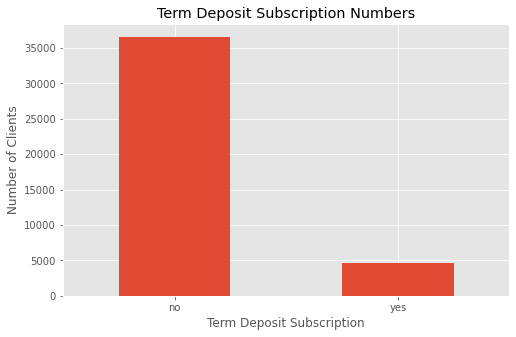

In [10]:
df_bank["y"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Term Deposit Subscription Numbers") #set title of Bar Chart
plt.ylabel("Number of Clients") #set title of Y axis
plt.xlabel("Term Deposit Subscription") #set title of X axis
plt.style.use('dark_background')
plt.show()

4.1.2. Insight

Mostly of the client do not subscribe the term deposit.

**4.2. Pie Chart**

4.2.1. Show the Call Data for the Last Year

In [11]:
#Get the month data
df_bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

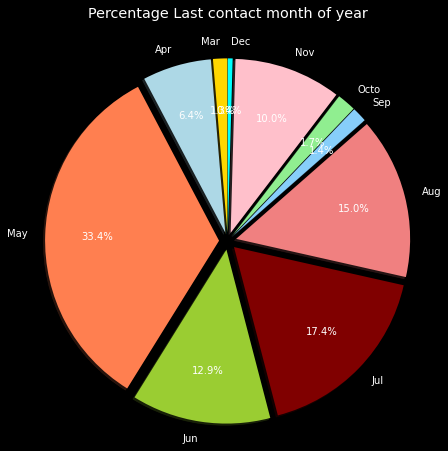

In [12]:
#Prepare the data and show to the Pie Chart
mar = df_bank.loc[df_bank['month'] == 'mar'].count()[0]
apr = df_bank.loc[df_bank['month'] == 'apr'].count()[0]
may = df_bank.loc[df_bank['month'] == 'may'].count()[0]
jun = df_bank.loc[df_bank['month'] == 'jun'].count()[0]
jul = df_bank.loc[df_bank['month'] == 'jul'].count()[0]
aug = df_bank.loc[df_bank['month'] == 'aug'].count()[0]
sep = df_bank.loc[df_bank['month'] == 'sep'].count()[0]
octo = df_bank.loc[df_bank['month'] == 'oct'].count()[0]
nov = df_bank.loc[df_bank['month'] == 'nov'].count()[0]
dec = df_bank.loc[df_bank['month'] == 'dec'].count()[0]
data_month = [mar, apr, may, jun, jul, aug, sep, octo, nov, dec]

labels = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Octo', 'Nov', 'Dec']
colors = ["gold", "lightblue", "coral", "yellowgreen", "maroon", "lightcoral", "lightskyblue", "lightgreen", "pink", "cyan"]
explode_sequence = ('0.1,' * 10).split(',')
explode_sequence = [float(item) for item in explode_sequence if item !=""]

plt.pie(data_month, labels=labels, colors=colors, radius=2, autopct='%1.1f%%', explode=explode_sequence,
        shadow=True, startangle=90, pctdistance=0.7)

plt.title("Percentage Last contact month of year", y=1.5)
plt.show()

4.2.2. Insight

The top 3 of call number mostly conducted in May with 33.4%, July with 17.4%, and August with 15%.

**4.3. Bar Chart**

4.3.1. To show the profile based on clients job who have term deposit or not. 

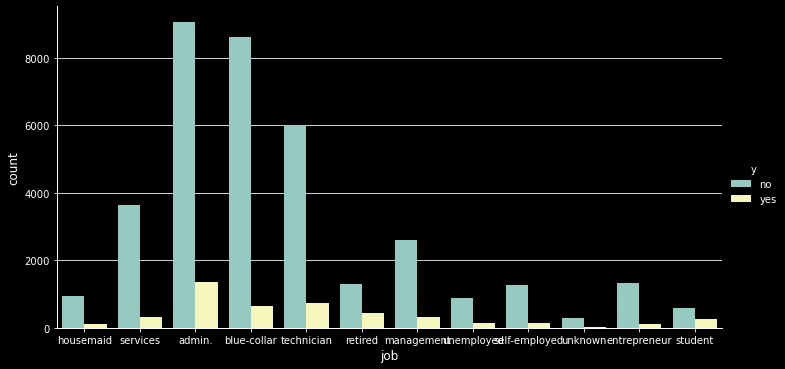

In [13]:
#Using seaborn from the data
sns.catplot(x='job',hue='y',kind='count',data=df_bank, aspect=2)

4.3.2. Insight

Clients who have the most term deposits are those who work as admin followed by technician.

# 5. Preprocressing Data - Modelling

**5.1. Check the uniqueness of each variables**

In [14]:
df_bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [15]:
df_bank.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
df_bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [17]:
df_bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [18]:
df_bank.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [19]:
df_bank.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [20]:
df_bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [21]:
df_bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [22]:
df_bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [23]:
df_bank.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

**5.2. Drop variables that have not important to enter the model**

Since all the paramater already had the fit or proper data type and had no missing value, now let's see the columns with no potential become the model atributes. *Contact, month, day_of_week, and duration* should be discarded as model input to have a realistic predictive model. 

In [24]:
df_bank=df_bank.drop(columns=['day_of_week', 'month', 'contact','duration','poutcome'])
df_bank.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


**5.3. Change the categorical attribute to the numerical attribute**

Before training the model, let's replace all the categorical parameter(columns) except the target with numerical initial.

In [25]:
df_bank["job_"] = df_bank["job"].replace({"housemaid": 0, "services": 1, "admin.": 2, "blue-collar": 3, "technician": 4, "retired": 5, "management": 6, "unemployed": 7, "self-employed": 8, "entrepreneur": 9, "student": 10, "unknown": 99})
df_bank["marital_"] = df_bank["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
df_bank["education_"] = df_bank["education"].replace({"basic.4y": 0, "high.school": 1, "basic.6y": 2, "basic.9y": 3, "professional.course": 4, "university.degree": 5, "illiterate": 6, "unknown": 99})
df_bank["default_"] = df_bank["default"].replace({"no": 0, "yes": 1, "unknown": 99})
df_bank["housing_"] = df_bank["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
df_bank["loan_"] = df_bank["loan"].replace({"no": 0, "yes": 1, "unknown": 99})

In [26]:
df_bank = df_bank.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
df_bank.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1


# 6. Training Model

In [27]:
#1. Import data has been done in the very 1st stage if this project.

In [28]:
#2. Prepare data features (X) and the target (y)
X = df_bank.drop(["y"], axis=1)
y = df_bank["y"]

In [29]:
#3. We gonna use some machine learning method, then we set the function to run it
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualitation")
    plot_confusion_matrix(model, X_test, y_test)

# 6.1. Logistic Regression

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.103s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25557
         yes       0.71      0.19      0.30      3274

    accuracy                           0.90     28831
   macro avg       0.81      0.59      0.62     28831
weighted avg       0.88      0.90      0.87     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.69      0.18      0.28      1366

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

Testing Data Confusion Matrix Visualitation


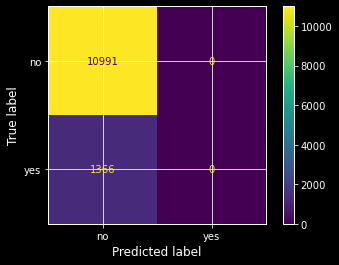

In [30]:
train_model(X,y,LogisticRegression())

# 6.2. K-Nearest Neighbors

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=109
)

In [32]:
#1. Let's find out the optimal value for k
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.15262604191955975, 0.11248684955895444, 0.11774702597717893, 0.10779315367807721, 0.10811685684227564, 0.1046370478271425, 0.10609371206603545, 0.10269482884195193, 0.10415149308084487, 0.10131909039410861, 0.10496075099134095, 0.10253297725985272, 0.10431334466294408, 0.10326130937929918, 0.10455612203609291, 0.10245205146880311, 0.10439427045399369, 0.10204742251355507, 0.10326130937929918, 0.1014000161851582, 0.10204742251355507, 0.10059075827466213, 0.10180464514040624, 0.10099538722991017, 0.10196649672250546, 0.10059075827466213, 0.10188557093145585, 0.10091446143886057, 0.10156186776725742, 0.1001052035283645, 0.10131909039410861, 0.10050983248361253, 0.10083353564781096, 0.10059075827466213, 0.10099538722991017, 0.09986242615521566, 0.1002670551104637, 0.09937687140891802, 0.1001052035283645]


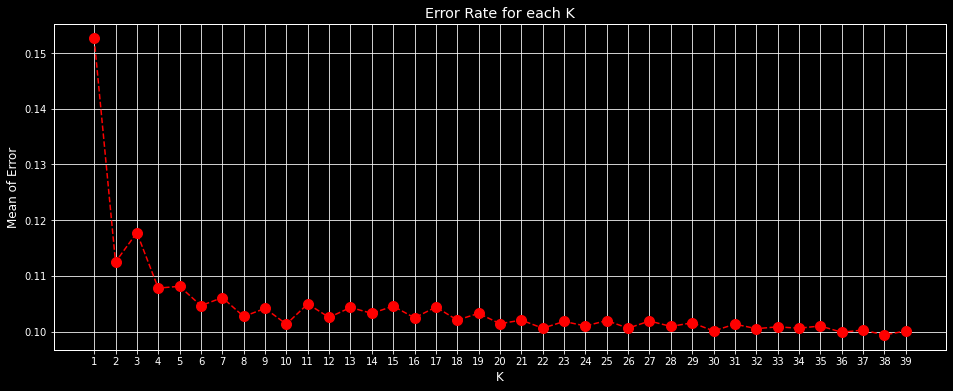

In [33]:
#2 Now plot the error value for each K
plt.figure(figsize=(16, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training KNeighborsClassifier in 0.449s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     25557
         yes       0.68      0.25      0.36      3274

    accuracy                           0.90     28831
   macro avg       0.79      0.62      0.66     28831
weighted avg       0.88      0.90      0.88     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10991
         yes       0.64      0.23      0.33      1366

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Testing Data Confusion Matrix Visualitation


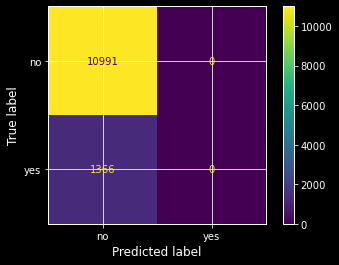

In [34]:
#3. Since the lowest error on K=39, then we'll set the n_neighbors =39
train_model(X,y,KNeighborsClassifier(n_neighbors=39))

# 6.3. Support Vector Machine

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training SVC in 151.998s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     25557
         yes       0.64      0.21      0.32      3274

    accuracy                           0.90     28831
   macro avg       0.77      0.60      0.63     28831
weighted avg       0.88      0.90      0.87     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.63      0.20      0.30      1366

    accuracy                           0.90     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

Testing Data Confusion Matrix Visualitation


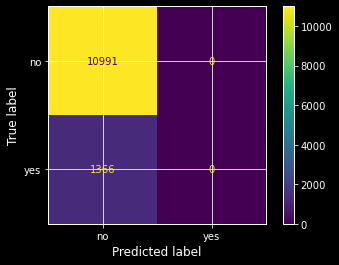

In [35]:
train_model(X,y,SVC(kernel="linear"))

# 6.4. Decision Tree

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.119s
Training performance:
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     25557
         yes       1.00      0.95      0.97      3274

    accuracy                           0.99     28831
   macro avg       1.00      0.97      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.90      0.91     10991
         yes       0.29      0.33      0.31      1366

    accuracy                           0.84     12357
   macro avg       0.60      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357

Testing Data Confusion Matrix Visualitation


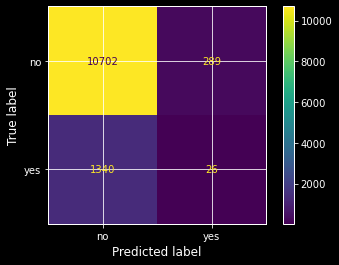

In [36]:
# let's set max depth = 5 so that the iteration not so long
train_model(X,y,DecisionTreeClassifier(criterion="entropy"))

# 6.5. Random Forest

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 1.734s
Training performance:
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     25557
         yes       0.99      0.96      0.97      3274

    accuracy                           0.99     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10991
         yes       0.52      0.27      0.36      1366

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357

Testing Data Confusion Matrix Visualitation


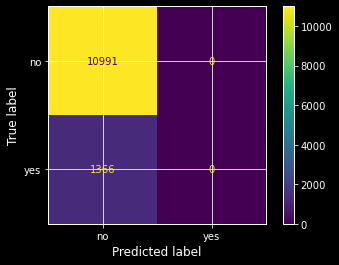

In [37]:
train_model(X,y,RandomForestClassifier())

# 6.6. Naive Bayes

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training GaussianNB in 0.036s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.88      0.91     25557
         yes       0.35      0.51      0.41      3274

    accuracy                           0.84     28831
   macro avg       0.64      0.69      0.66     28831
weighted avg       0.87      0.84      0.85     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.87      0.90     10991
         yes       0.33      0.51      0.40      1366

    accuracy                           0.83     12357
   macro avg       0.63      0.69      0.65     12357
weighted avg       0.87      0.83      0.85     12357

Testing Data Confusion Matrix Visualitation


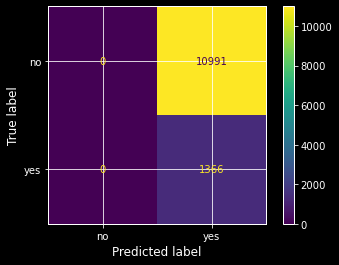

In [38]:
train_model(X,y,GaussianNB())

# 7. Comparison among the Algorithm

**7.1. Create the Comparison Summary**

In [39]:
# Create the summary in a table
# f1 score: testing performance
Summary = pd.DataFrame(
    {
        "Model": ['Logistic Regression',"KNN",
                  "SVC","Decision Tree","Random Forest","GNB"],
        "Training Accuracy": [0.90, 0.90, 0.90, 0.99, 0.99, 0.84],
        "Testing Testing Accuracy": [0.90, 0.90, 0.90, 0.84, 0.89, 0.83],
        "Duration in Sec": [0.103, 0.449, 151.998, 0.199, 1.734, 0.036],
    },
)
Summary

,Model,Training Accuracy,Testing Testing Accuracy,Duration in Sec
0,Logistic Regression,0.90,0.90,0.103
1,KNN,0.90,0.90,0.449
2,SVC,0.90,0.90,151.998
3,Decision Tree,0.99,0.84,0.199
4,Random Forest,0.99,0.89,1.734
5,GNB,0.84,0.83,0.036


**7.2. Analysis**

The Bank Marketing Dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

So now we have to decide which one is the best model, and we have 4 types of values:
1. True Prositive - means that the client do SUBSCRIBED to term deposit, and the model thinks they did.
2. False Positive - means the client do NOT SUBSCRIBED to term deposit, but the model thinks they did.
3. False Negative - means the client SUBSCRIBED to term deposit, but the model said they dont.
4. True Negative - means the client do NOT SUBSCRIBED to term deposit, but the model said they don't.

From the above table summary, we could revew the performance of each model on their accuracy.

1. **Logistic Regression** - Both for training and testing accuracy have similiar value at 0.90 with duration 0.103 sec. We could say that the performance of Logistic Regression is stable in short duration. 
   
2. **KNeighbors (KNN)** - Both for training and testing accuracy have similiar value at 0.90 with duration 0.449 sec. We could say that the performance of Logistic Regression is stable for less than 1 sec.
   
3. **Support Vehicle Machine (SVC)** - Both for training and testing performance have similiar value at 0.90 with duration 151.998 sec. We could say that the performance of Logistic Regression is stable but we need to wait for the result for 151.998 sec.

4. **Decision Tree** - Decision tree model can be done in a short time at 0.199 sec and it has a good training performance since the accuray is 0.90 but then the accuracy drop to 0.84. We could say that the performance is not stable eventhough the duration to get the result quiet fast. 

5. **Random Forest** - Random forest model can be done in 1.734 sec and it has a good training performance since the accuray is 0.90 but then the accuracy drop to 0.84. We could say that the performance is not stable and the duration to get the result quiet long.

6. **Naive Bayes (GNB)** - Naive biyas model record the fastest duration at 0.036 sec but it has a a poor training and testing accuracy  at 0.84 and 0.83. We could say that the performance is poor eventough the duration is the fastest.

**7.3. Insight**

I would like to say that Logistic Regression is the fit and proper model in order to decide the type of values (TP/FP/FN/TN) for the  Bank Marketing Dataset since it has stable performance both for training and testing accuracy (0.90) and also for the time connsumption (0.103 sec) compared to other models. 